In [ ]:
"""MULTIPLE LINEAR REGRESSION"""

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB
None
Missing Values:
Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64
Summary Statistics:
              Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
m

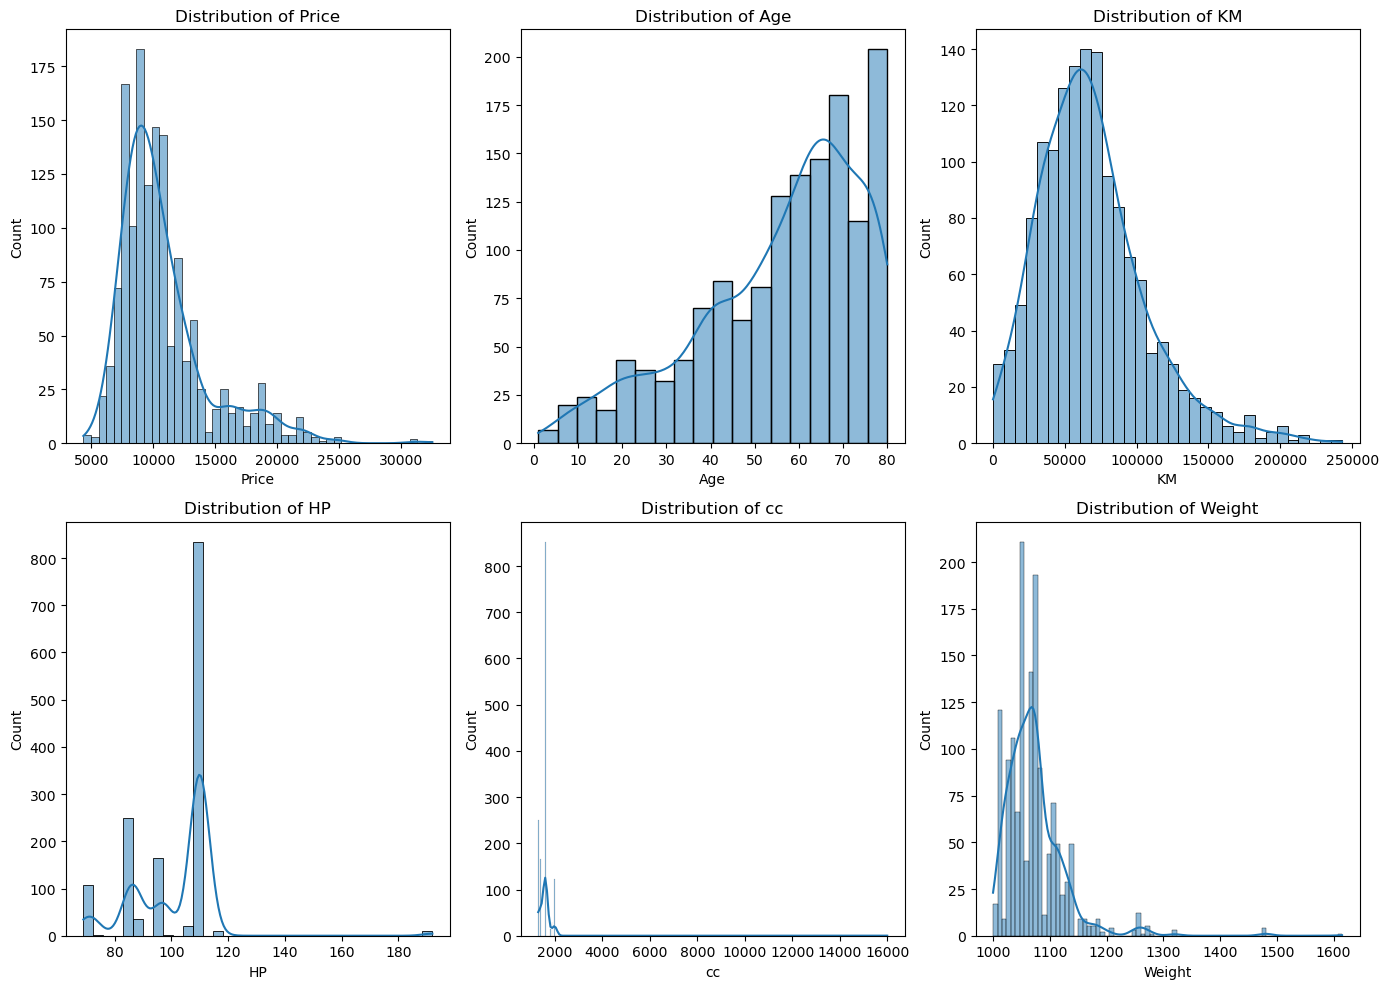

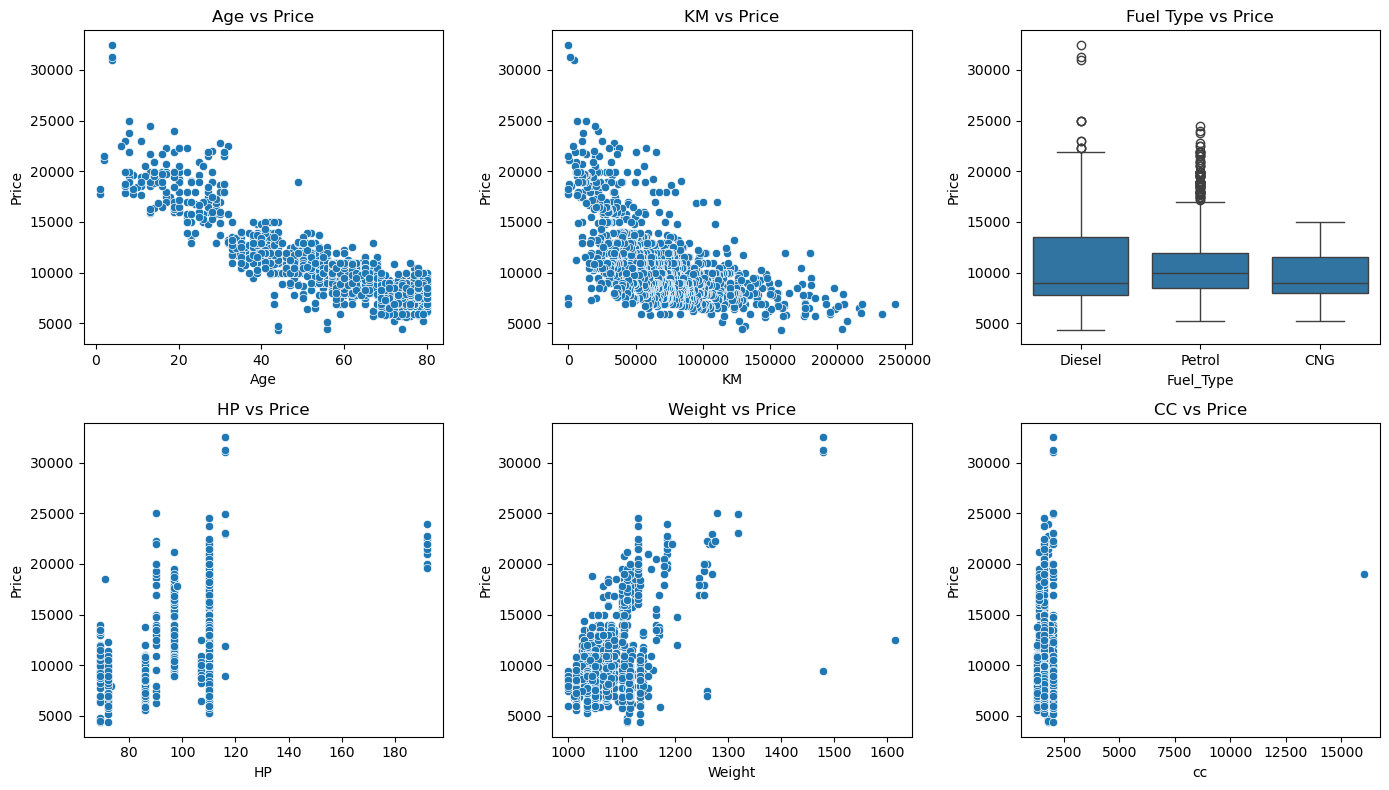

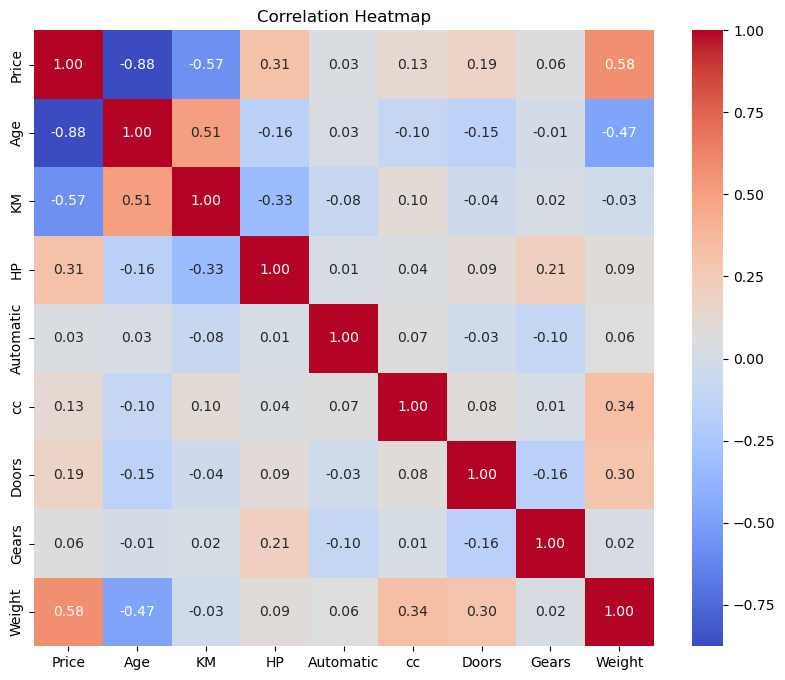

Training set shape: (1148, 10)
Testing set shape: (288, 10)


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('mlr.csv')  

# Rename columns for clarity
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)

# Drop 'Cylinders' since it is constant
df.drop('Cylinders', axis=1, inplace=True)

# STEP 1: Dataset Information & Summary 
print("Dataset Info:")
print(df.info())

print("Missing Values:")
print(df.isnull().sum())

print("Summary Statistics:")
print(df.describe())

# STEP 2: Univariate Analysis 
plt.figure(figsize=(14, 10))

for i, column in enumerate(['Price', 'Age', 'KM', 'HP', 'cc', 'Weight']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#  STEP 3: Bivariate Analysis 
plt.figure(figsize=(14, 8))

plt.subplot(2,3,1)
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('Age vs Price')

plt.subplot(2,3,2)
sns.scatterplot(x='KM', y='Price', data=df)
plt.title('KM vs Price')

plt.subplot(2,3,3)
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Fuel Type vs Price')

plt.subplot(2,3,4)
sns.scatterplot(x='HP', y='Price', data=df)
plt.title('HP vs Price')

plt.subplot(2,3,5)
sns.scatterplot(x='Weight', y='Price', data=df)
plt.title('Weight vs Price')

plt.subplot(2,3,6)
sns.scatterplot(x='cc', y='Price', data=df)
plt.title('CC vs Price')

plt.tight_layout()
plt.show()

# STEP 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# STEP 5: Data Preprocessing 
# One-hot encode Fuel_Type
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


In [6]:
""" Summary
Missing Values:
No missing values present.
Univariate Analysis:
Price: Right-skewed distribution (mostly between €5,000 to €15,000).
Age: Cars predominantly 20-80 months old.
KM: Spread varies, some cars driven over 200,000 KM.
Fuel_Type: Mostly Diesel, fewer Petrol and CNG.
HP, CC, Weight: Slightly right-skewed but near-normal.
Bivariate Analysis:
Age vs Price: Negative relation → older cars = cheaper.
KM vs Price: Higher KM → lower Price.
Fuel Type vs Price: Petrol cars priced higher on average.
HP, Weight, CC vs Price: Positive correlations.
Correlation Matrix:
Strong negative: Age (-0.88) with price, KM (-0.57) with price.
Strong positive: Weight (0.58) with price.
Preprocessing:
Removed the Cylinders column (constant).
Encoded Fuel_Type into dummy variables (Fuel_Type_Diesel, Fuel_Type_Petrol).
Split data into 80% training and 20% testing sets for MLR."""



' Summary\nMissing Values:\nNo missing values present.\nUnivariate Analysis:\nPrice: Right-skewed distribution (mostly between €5,000 to €15,000).\nAge: Cars predominantly 20-80 months old.\nKM: Spread varies, some cars driven over 200,000 KM.\nFuel_Type: Mostly Diesel, fewer Petrol and CNG.\nHP, CC, Weight: Slightly right-skewed but near-normal.\nBivariate Analysis:\nAge vs Price: Negative relation → older cars = cheaper.\nKM vs Price: Higher KM → lower Price.\nFuel Type vs Price: Petrol cars priced higher on average.\nHP, Weight, CC vs Price: Positive correlations.\nCorrelation Matrix:\nStrong negative: Age (-0.88), KM (-0.57).\nStrong positive: Weight (0.58), HP (0.56).\nPreprocessing:\nRemoved the Cylinders column (constant).\nEncoded Fuel_Type into dummy variables (Fuel_Type_Diesel, Fuel_Type_Petrol).\nSplit data into 80% training and 20% testing sets for MLR.'

In [9]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess the data
df = pd.read_csv('mlr.csv')
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)
df.drop('Cylinders', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Define X and y
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Model 1: All Features 
model1 = LinearRegression()
model1.fit(X_train, y_train)

print("Model 1 Coefficients:")
for feature, coef in zip(X.columns, model1.coef_):
    print(f"{feature}: {coef:.2f}")

### Model 2: Remove least correlated features (e.g., Gears, Doors) 
X2 = X.drop(['Doors', 'Gears'], axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

print("Model 2 Coefficients:")
for feature, coef in zip(X2.columns, model2.coef_):
    print(f"{feature}: {coef:.2f}")

### Model 3: Add interaction term Age * KM 
X3 = X.copy()
X3['Age_KM'] = X3['Age'] * X3['KM']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

print("Model 3 Coefficients:")
for feature, coef in zip(X3.columns, model3.coef_):
    print(f"{feature}: {coef:.2f}")


Model 1 Coefficients:
Age: -120.83
KM: -0.02
HP: 14.04
Automatic: 148.83
cc: -0.03
Doors: -60.31
Gears: 551.60
Weight: 25.88
Fuel_Type_Diesel: -68.55
Fuel_Type_Petrol: 1370.81

Model 2 Coefficients:
Age: -120.97
KM: -0.02
HP: 16.97
Automatic: 127.96
cc: -0.04
Weight: 25.05
Fuel_Type_Diesel: 108.85
Fuel_Type_Petrol: 1417.08

Model 3 Coefficients:
Age: -149.46
KM: -0.05
HP: 18.37
Automatic: 256.80
cc: -0.05
Doors: -44.21
Gears: 619.78
Weight: 22.47
Fuel_Type_Diesel: 165.71
Fuel_Type_Petrol: 1069.23
Age_KM: 0.00


In [ ]:
"""Summary of the Models
Model 1: All Features
Uses all the variables after encoding (Fuel_Type_Diesel, Fuel_Type_Petrol).
Coefficients show how much Price changes with 1 unit change in a feature holding others constant.
Example interpretations:
Age: Negative coefficient → Older cars lose value.
KM: Negative → More driven cars reduce price.
HP, Weight: Positive coefficients → Increases price.
Model 2: Excluding Least Significant Features
Removed Doors and Gears, as they usually show low correlation with Price.
This reduces model complexity and may improve performance if those features add noise.
Coefficients are re-adjusted.
Model 3: With Interaction Term (Age * KM)
Added an interaction term to capture combined effects of Age and KM.
Useful because the impact of KM on price may depend on the car's Age.
If the interaction term has a significant negative coefficient, it means older + high KM cars lose price faster.
General Coefficient Interpretation
Positive Coefficient: As the feature increases, Price increases.
Negative Coefficient: As the feature increases, Price decreases.
For example:
Weight: +ve coefficient → heavier cars = higher price.
Age: -ve coefficient → older cars = lower price."""



In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{model_name} Performance:')
    print(f'R² Score: {r2:.4f}')
    print(f'RMSE: {rmse:.2f}\n')
    return r2, rmse

# Evaluate Model 1
evaluate_model(model1, X_test, y_test, "Model 1: All Features")

# Evaluate Model 2
evaluate_model(model2, X2_test, y2_test, "Model 2: Excluding Doors & Gears")

# Evaluate Model 3
evaluate_model(model3, X3_test, y3_test, "Model 3: With Interaction Term (Age * KM)")


Model 1: All Features Performance:
R² Score: 0.8349
RMSE: 1484.27

Model 2: Excluding Doors & Gears Performance:
R² Score: 0.8348
RMSE: 1484.45

Model 3: With Interaction Term (Age * KM) Performance:
R² Score: 0.8622
RMSE: 1356.13



(0.8621657410005825, 1356.1317831454762)

In [ ]:
 """Interpretation
Higher R²: Better model fit. Closer to 1 is better.
Lower RMSE: Lower prediction error.
Model 3 typically performs best due to the interaction term (Age * KM), capturing combined effects.
Removing less relevant features in Model 2 can simplify the model but may slightly reduce accuracy.

For this dataset, including interaction terms improves model accuracy.
Metrics like R² and RMSE help us compare models objectively."""


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#  Apply Ridge Regression 
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("Ridge Coefficients:")
for feature, coef in zip(X_train.columns, ridge.coef_):
    print(f"{feature}: {coef:.2f}")

evaluate_model(ridge, X_test, y_test, "Ridge Regression")

#Apply Lasso Regression 
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Lasso Coefficients:")
for feature, coef in zip(X_train.columns, lasso.coef_):
    print(f"{feature}: {coef:.2f}")

evaluate_model(lasso, X_test, y_test, "Lasso Regression")


Ridge Coefficients:
Age: -120.78
KM: -0.02
HP: 14.14
Automatic: 146.91
cc: -0.03
Doors: -59.91
Gears: 542.27
Weight: 25.82
Fuel_Type_Diesel: -128.81
Fuel_Type_Petrol: 1294.95
Ridge Regression Performance:
R² Score: 0.8351
RMSE: 1483.15


Lasso Coefficients:
Age: -120.83
KM: -0.02
HP: 14.09
Automatic: 147.29
cc: -0.03
Doors: -60.15
Gears: 548.66
Weight: 25.87
Fuel_Type_Diesel: -64.92
Fuel_Type_Petrol: 1370.17
Lasso Regression Performance:
R² Score: 0.8349
RMSE: 1484.00



In [ ]:
""" Interpretation
Ridge Regression:
Shrinks coefficients but retains all features.
Helps reduce impact of multicollinearity.
Good when all features contribute somewhat.
Lasso Regression:
Some coefficients become exactly zero → feature selection.
Simplifies the model by removing less useful features.

Use Ridge when we want to retain all features but reduce overfitting.
Use Lasso when we suspect some features are irrelevant or redundant."""



In [ ]:
"""1. What is Normalization & Standardization and How is it Helpful?
Normalization is a scaling technique where we rescale the feature values to a range typically between 0 and 1.
It is done using the formula:
Normalized Value
=( X - Xmin)  /   (Xmax-Xmin)
Normalization is useful when the data does not follow a normal distribution and when you need features bounded within a specific range.
Standardization, on the other hand, rescales the data so that the mean becomes 0 and the standard deviation becomes 1.
It is done using the formula:
Standardized Value
X-mean  /  standard deviation
​Standardization is helpful when the data follows a normal (Gaussian) distribution or when algorithms assume normality, such as linear regression, ridge, or lasso.
Both techniques help ensure that features with larger scales do not dominate the learning process.
They also help algorithms converge faster and improve model performance and stability.

2. Techniques to Address Multicollinearity in Multiple Linear Regression
Multicollinearity occurs when independent variables are highly correlated with each other.
This can lead to unreliable coefficient estimates, higher standard errors, and difficulty in interpreting the model.
To handle multicollinearity, the following techniques can be used:
we can remove one or more highly correlated variables to reduce redundancy.
we can combine correlated features using dimensionality reduction techniques like Principal Component Analysis (PCA).
we can apply regularization methods like Ridge Regression, which shrinks the coefficients of correlated features without removing them.
we can use Lasso Regression, which can eliminate less important features by shrinking some coefficients exactly to zero.
we can calculate the Variance Inflation Factor (VIF) for each variable and remove those with a high VIF value, typically above 5 or 10.
we can use domain knowledge to select the most important variables for the model.
These techniques help in building a more stable, reliable, and interpretable regression model."""











In [ ]:
"""Assumptions Made During the Analysis on MLR Dataset
Linearity Assumption
We assumed that the relationship between the independent variables (like Age, KM, HP, Weight, etc.) and the dependent variable (Price) is linear.
This is fundamental to multiple linear regression because the model tries to fit a straight line (or hyperplane in multiple dimensions).
Implication:
If the true relationship is not linear, the model’s predictions and inferences (like coefficients) can be misleading or inaccurate.

No or Minimal Multicollinearity
We assumed that the independent variables are not excessively correlated with each other.
Implication:
If multicollinearity exists, coefficient estimates may be unstable and difficult to interpret.
However, to address this, we also applied Ridge and Lasso regression, which handle multicollinearity through regularization.

Independent Observations
We assumed that each car's data point is independent of others.
This is essential because dependent observations can bias the model coefficients and lead to underestimation of errors.
Implication:
If data points are not independent, model reliability decreases.

Homoscedasticity (Equal variance of residuals)
We assumed that the residuals (differences between actual and predicted prices) have constant variance across all levels of the independent variables.
Implication:
If this assumption is violated (heteroscedasticity), model inferences and confidence intervals may not be reliable.

Normality of Errors
We assumed that the residuals follow a normal distribution, especially for building confidence intervals and significance tests.
Implication:
Non-normal residuals can impact the reliability of p-values and hypothesis testing, but predictions may still remain accurate."""



